# Final Exam (part 1) - Computational Physics I

### Deadline: Tuesday 10 December 2024 (by 17h00)
### Credits: 10 points

### Please keep the structure provided below and submit an organised notebook with clear answers to each item.

## Name:

## 1. Symbolic algebra: sympy for physics (10 points) 

## 1.1. Lennard-Jones Potential and Forces (optimisation, 5 points)

The potential energy of a particle in a field has the form:

$$V(r) = 4\epsilon \left[ \left(\frac{\sigma}{r}\right)^{12} - \left(\frac{\sigma}{r}\right)^6 \right]$$

where $r$ is the distance between the particles, $\epsilon$ is the depth of the potential well describing the strength of the attraction, and $\sigma$ is the distance at which the potential energy is zero.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
import scienceplots
import scipy.optimize as opt

In [2]:
# set style for plots
plt.style.use(['science', 'notebook', 'no-latex'])

(a) Create a python function to compute this potential $V(r)$ as a function of $r$ for fiducial values of $\epsilon$ and $\sigma$.

Then, create an appropriate vector for $r$ and plot this potential $V(r)$ versus $r$.

In [3]:
# define the function
def LennardJones(r_vec, epsilon_val, sigma_val, simbolic = False):
    """ 
    This function computes the Lennard-Jones potential for a given distance r
    between two particles. The parameters epsilon and sigma are the depth of the
    potential well and the distance at which the potential is zero, respectively.

    Arguments: 
            - r (numpy array): distance between two particles
            - epsilon (float): depth of the potential well
            - sigma (float): distance at which the potential is zero.

    Returns:
            - V (numpy array): Lennard-Jones potential for the given parameters.
    """
    if simbolic:
        global r
        global epsilon
        global sigma
        r, epsilon, sigma = sp.symbols('r epsilon sigma')
        epsilon = sp.symbols('epsilon', Constant = True)
        sigma = sp.symbols('sigma', Constant = True)
        V = 4 * epsilon * ((sigma / r) ** 12 - (sigma / r) ** 6)
        return V

    else:
        V = 4 * epsilon_val * ((sigma_val / r_vec) ** 12 - (sigma_val / r_vec) ** 6)
        return V

In [4]:
# define the distance range
epsilon_val = 1.5
sigma_val = 1
r_val= np.linspace(0.01, 3.0, 500)

# compute the Lennard-Jones potential
V = LennardJones(r_val, epsilon_val, sigma_val)

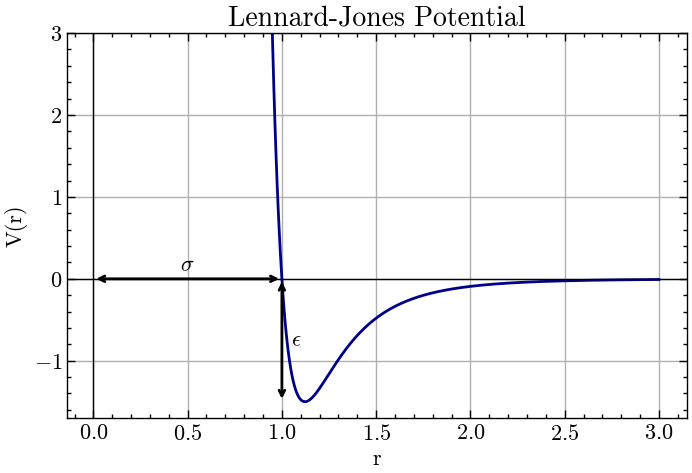

In [6]:
# Plot the Lennard-Jones potential
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(r_val, V, color = 'darkblue')
ax.set_title('Lennard-Jones Potential', fontsize = 20)
ax.set(xlabel='r', ylabel='V(r)')
ax.axhline(0, color = 'black', lw = 1)
ax.axvline(0, color = 'black', lw = 1)

# Arrow for sigma
ax.annotate(
    "",
    xy=(0, 0), xytext=(sigma_val, 0),
    arrowprops = dict(arrowstyle = "<->", color = "black", lw = 2))
ax.text(sigma_val / 2, 0.1, r'$\sigma$', ha = 'center', fontsize = 16)

# Arrow for epsilon
ax.annotate(
    "",
    xy=(sigma_val, 0), xytext=(sigma_val, -epsilon_val),
    arrowprops = dict(arrowstyle = "<->", color = "black", lw = 2))
ax.text(sigma_val * 1.05, -epsilon_val / 2, r'$\epsilon$', va = 'center', fontsize = 16)

ax.set_ylim(-1.7, 3)
plt.grid(True)
plt.show()
plt.close()

(b) Use sympy to compute the force: $F(r)=-\frac{dV}{dr}$ experienced by a particle at a distance $r$.

Then, lambdify your expression and plot the $F(r)$ versus $r$.

In [7]:
# Put our function into a sympy expression
ln_symbolic = LennardJones(r_val, epsilon_val, sigma_val, simbolic = True)

# Print the symbolic expression
ln_symbolic

4*epsilon*(-sigma**6/r**6 + sigma**12/r**12)

In [8]:
# Now, we can compute the derivative of the Lennard-Jones potential
F_symbolic = -1 * sp.diff(ln_symbolic, r)

# Print the symbolic expression
F_symbolic

-4*epsilon*(6*sigma**6/r**7 - 12*sigma**12/r**13)

In [9]:
# Lambdify the expression
F = sp.lambdify((r, epsilon, sigma), F_symbolic)

# Compute the force
F_val = F(r_val, epsilon_val, sigma_val)

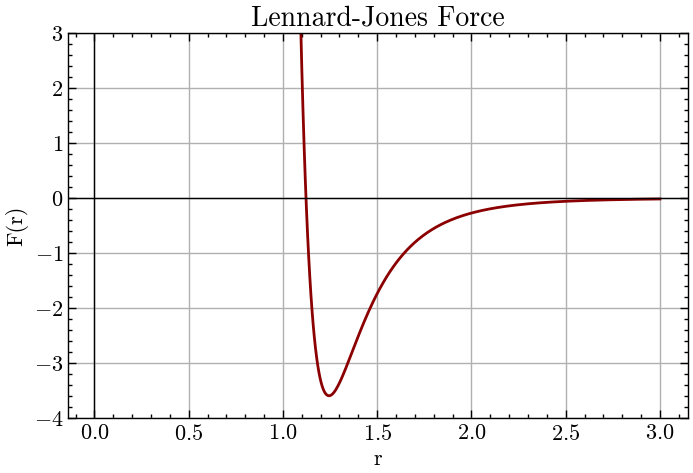

In [10]:
# Plot the Lennard-Jones Force
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(r_val, F_val, color = 'darkred')
ax.set_title('Lennard-Jones Force', fontsize = 20)
ax.set(xlabel='r', ylabel='F(r)')
ax.axhline(0, color = 'black', lw = 1)
ax.axvline(0, color = 'black', lw = 1)

ax.set_ylim(-4, 3)
plt.grid(True)
plt.show()
plt.close()

Now, let's plot the potential and force on the same graph.

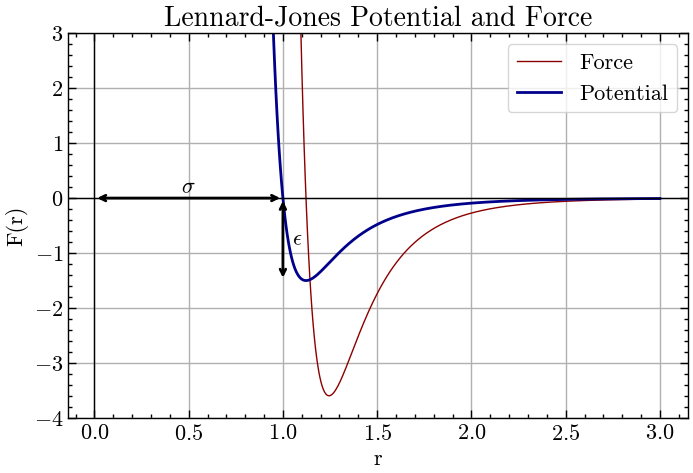

In [11]:
# Plot the Lennard-Jones Potential and Force
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(r_val, F_val, color = 'darkred', linewidth = 1, label = 'Force')
ax.plot(r_val, V, color = 'darkblue', label = 'Potential')
ax.set_title('Lennard-Jones Potential and Force', fontsize = 20)
ax.set(xlabel='r', ylabel='F(r)')

# Arrow for sigma
ax.annotate(
    "",
    xy=(0, 0), xytext=(sigma_val, 0),
    arrowprops = dict(arrowstyle = "<->", color = "black", lw = 2))
ax.text(sigma_val / 2, 0.1, r'$\sigma$', ha = 'center', fontsize = 16)

# Arrow for epsilon
ax.annotate(
    "",
    xy=(sigma_val, 0), xytext=(sigma_val, -epsilon_val),
    arrowprops = dict(arrowstyle = "<->", color = "black", lw = 2))
ax.text(sigma_val * 1.05, -epsilon_val / 2, r'$\epsilon$', va = 'center', fontsize = 16)


ax.axhline(0, color = 'black', lw = 1)
ax.axvline(0, color = 'black', lw = 1)
ax.set_ylim(-4, 3)
plt.legend(frameon = True)
plt.grid()
plt.show()
plt.close()

(c) Find the maximum possible value of the attractive force, $F_{max}$, and the distance, $r_{max}$, at which the particle would be subjected to this force.


To find the maximum value of the attractive force, we can differentiate the force function with respect to $r$ and set it equal to zero. This will give us the value of $r$ at which the force is maximum. We can then substitute this value of $r$ back into the force function to find the maximum value of the force.

In [12]:
# Differentiate the force
dF_symbolic = sp.diff(F_symbolic, r)

# Print the symbolic expression
dF_symbolic

-4*epsilon*(-42*sigma**6/r**8 + 156*sigma**12/r**14)

In [13]:
# Lambdify the expression
dF = sp.lambdify((r, epsilon, sigma), dF_symbolic, 'numpy')

# Find it with guess = 1.3
r_max = opt.fsolve(dF, 1, args = (epsilon_val, sigma_val))

# Evaluate it
f_max = F(r_max, epsilon_val, sigma_val)

# Print the result
print(f"The maximum force is {f_max[0]:.2f} at r = {r_max[0]:.2f}")

The maximum force is -3.59 at r = 1.24


The maximum value of the attractive force is approximately $F_{max} = -3.59$ and occurs at a distance of $r_{max} = 1.24$.

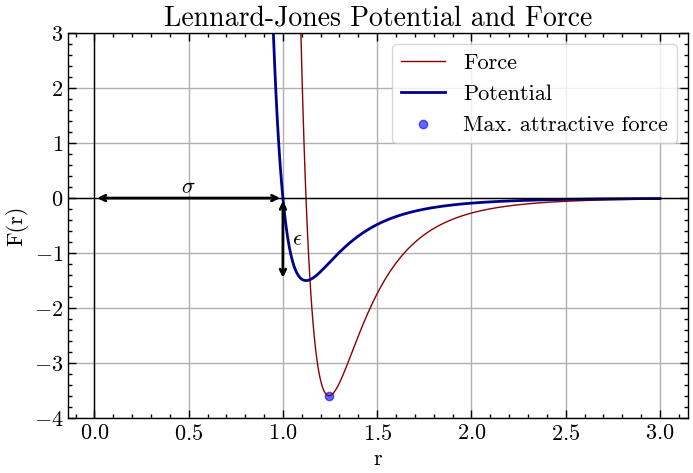

In [14]:
# Plot the Lennard-Jones Potential and Force
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(r_val, F_val, color = 'darkred', linewidth = 1, label = 'Force')
ax.plot(r_val, V, color = 'darkblue', label = 'Potential')
plt.scatter(r_max, f_max, alpha = 0.6, color = 'b', label = 'Max. attractive force')
ax.set_title('Lennard-Jones Potential and Force', fontsize = 20)
ax.set(xlabel='r', ylabel='F(r)')

# Arrow for sigma
ax.annotate(
    "",
    xy=(0, 0), xytext=(sigma_val, 0),
    arrowprops = dict(arrowstyle = "<->", color = "black", lw = 2))
ax.text(sigma_val / 2, 0.1, r'$\sigma$', ha = 'center', fontsize = 16)

# Arrow for epsilon
ax.annotate(
    "",
    xy=(sigma_val, 0), xytext=(sigma_val, -epsilon_val),
    arrowprops = dict(arrowstyle = "<->", color = "black", lw = 2))
ax.text(sigma_val * 1.05, -epsilon_val / 2, r'$\epsilon$', va = 'center', fontsize = 16)


ax.axhline(0, color = 'black', lw = 1)
ax.axvline(0, color = 'black', lw = 1)
ax.set_ylim(-4, 3)
plt.legend(frameon = True)
plt.grid()
plt.show()
plt.close()

#### Please provide your answers to these questions in a markdown cell:

(d) Describe the behavior of the potential at short and long distances.

At which "equilibrium" distance, $r_0$, does the force become zero?

At shortdistances, the potential is dominated by the repulsive term, which goes as $r^{-12}$. This means that the potential increases rapidly as the distance between the particles decreases. At long distances, the potential is dominated by the attractive term, which goes as $r^{-6}$. This means that the potential decreases slowly and approaches to 0 as the distance between the particles increases.

On the other hand, the force is zero at the equilibrium distance, $r_0$, which can be computed as follows:

$$F(r_0) = -\frac{dV}{dr} = 0$$

$$ - 4\epsilon \left[ -12\frac{\sigma^{12}}{r_0^{13}} + 6\frac{\sigma^6}{r_0^7} \right] = 0$$

$$ 12\frac{\sigma^{12}}{r_0^{13}} = 6\frac{\sigma^6}{r_0^7}$$

$$ 2^{1/6} \sigma = r_0$$

which, for our case with $\sigma = 1$, gives $r_0 = 2^{1/6} \approx 1.12$.

(e) Discuss the physical significance of the Lennard-Jones potential in real-world systems (e.g. the meaning of $\sigma$ and $\epsilon$).

Provide 2 examples of systems where this potential is applicable.

In real-world systems, the Lennard-Jones potential is used to model the interaction between neutral atoms or molecules in molecular dynamics simulations. 

Here, $\sigma$ represents the distance at which the potential between two particles is zero, often refered to as the **hard-sphere diameter**. This is the characteristic distance at which two particles "touch" each other, or when their electron clouds start to overlap.

On the other hand, $\epsilon$ represents the depth of the potential well, which is a measure of the strength of the attractive interaction between the particles at the equilibrium distance $r_0$. This parameter defines how strongly the particles are attracted to each other when they are at the equilibrium distance.

Two examples of systems where the Lennard-Jones potential is applicable are:

1. **Noble gases**: The Lennard-Jones potential is used to model the interaction between noble gas atoms, such as Argon, Krypton, and Xenon. These atoms are neutral and interact through van der Waals forces, which are well described by the Lennard-Jones potential.

2. **Adsorption interactions**: The Lennard-Jones potential is also used to model the interaction between adsorbate molecules and surfaces in adsorption processes. 

Sources: 

- https://mb.uni-paderborn.de/fileadmin-mb/tdy/Publikationen/Veroeffentlichungen/2017_nobleGases_LJ.pdf
- https://onlinelibrary.wiley.com/doi/full/10.1002/adts.202200896

## 1.2. Population dynamics (solutions to ODEs, 5 points)

The **Verhulst-Pearl model** is used to study animal population dynamics. This model is also called **logistic growth model** and assumes that $P(t)$ 
satisfies the following ODE:


$$\frac{dP}{dt}=\alpha\,P\left(1-\frac{P}{\beta}\right)$$


where $\alpha$ is the growth rate and $\beta$ is the limiting size for the population (also called the environment carrying capacity).


(a) Use sympy to find the general analytical solution to this ODE.

In [15]:
# Define the variables, constants and the function
t = sp.symbols('t')
alpha, beta = sp.symbols('alpha beta', positive = True, real = True)
P = sp.symbols("P", cls = sp.Function)

# Define the differential equation
ode = sp.Eq(P(t).diff(t), alpha * P(t) * (1 - P(t) / beta))

In [16]:
# Solve the differential equation
general_sln = sp.dsolve(ode, P(t))
general_sln

Eq(P(t), beta/(1 - exp(C1*beta - alpha*t)))

(b) Imagine we use this equation to study the population dynamics of a bird species re-introduced into nature, knowing that the test environment can only host $20$ individuals. We liberate $10$ individuals of this species in the wild, and we know that the growth rate is $0.2$ individuals per month. Rewrite and recompute both the ODE and its solution for this set of conditions.

In [17]:
# define the initial condition and the boundary condition
P0 = 10         # initial population
beta_val = 20   # carrying capacity
alpha_val = 0.2 # growth rate

# Solve the differential equation
particular_sln = sp.dsolve(ode.subs({alpha: alpha_val, beta: beta_val}), P(t), ics = {P(0): P0})

# Print the solution
particular_sln

Eq(P(t), -20.0/(-1.0 - 1.0*exp(-0.2*t)))

(c) Lambify your expression, make a plot of the analytical solution and label it appropriately.

In [18]:
# Lambdify the expression
P = sp.lambdify(t, particular_sln.rhs, 'numpy')

In [19]:
# Define the time range
t_val = np.linspace(0, 50, 500)

# Compute the population
P_val = P(t_val)

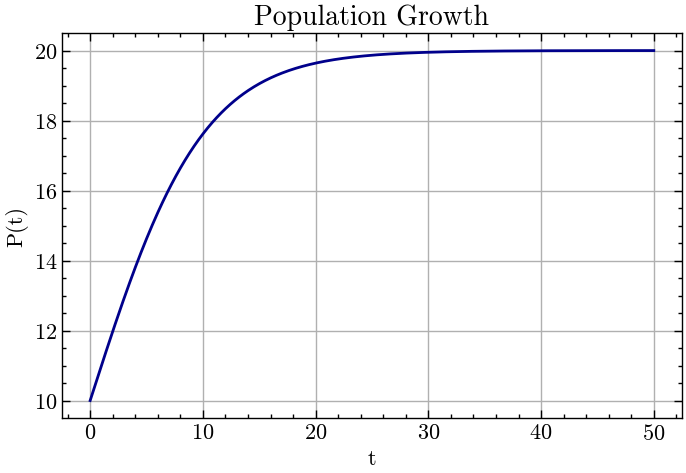

In [20]:
# Plot the population
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(t_val, P_val, color = 'darkblue')
ax.set_title('Population Growth', fontsize = 20)
ax.set(xlabel='t', ylabel='P(t)')
plt.grid(True)
plt.show()
plt.close()

#### Please provide your answers to these questions in a markdown cell:

(d) Briefly comment on the behavior of the population size over time, and the eventual population size as $t \to \infty$.

What are the biological interpretations of the parameters $\alpha$ and $\beta$ ? 

- **Behaviour:** The population grows rapidly at the beginning due to the avaliability of resources, but slows as it approaches the carrying capacityof the environment $\beta = 20$. Eventually, it stabilises at this value when $t \to \infty$.

- Biological interpretations:
    - $\alpha$: represents the intrinsic growth rate of the population, which is the rate at which the population grows in the absence of any limiting factors.

    - $\beta$: is the carrying capacity of the environment. This may be related to the avaliability of resources, space, or other factors that limit the growth of the population. The population will grow until it reaches this size, after which it will stabilise.
    

(e) Why does the population growth slow down as $P(t)$ approaches $\beta$ ?

How might the model change if external factors (e.g., predators, diseases, or resource scarcity) are introduced?

As the population size approaches the carrying capacity $\beta$, the term $\left(1-\frac{P}{\beta}\right)$ approaches zero, reducing the growth rate. Biologically this could imply increasing competition for resources as the population size approaches the carrying capacity.

**External factors**
- Predators/diseases: We may need to add a term $-\gamma P$ to the ODE, where $\gamma$ represents the rate at which the population is reduced due to predation or disease. 

- Resource scarcity: We can modify the time-independent term $\beta$ to reflect the environment capacity. 

- Catastrophic events: We could add a stochastic term to the ODE to account for random events that could affect the population size.